# Week 8 (November 27)

### Objectives
* Data collapse to expose finite-size effects $\checkmark$
* Change expression for the epsilon (radiation) without subtracting the destination location(s) $\checkmark$
* Improve moving average $\checkmark$
* Justify the approximation $k_{ij} \simeq k_{ib}$ by proving that the ratio between the _integral + sum_ (see derivation) goes to 1 (Jim) $\checkmark$
* Start thinking about more realistic population distribution models

In [25]:
%load_ext autoreload
%autoreload 2

In [26]:
from hm.analysis import random_tripoint as rt
from hm.pop_models.pop_random import random as pop_random
from hm.hm_models.gravity import gravity
from hm.hm_models.radiation import radiation
from matplotlib import pyplot as plt

### RADIATION

Previously we had subtracted the destination location from $s_ij$ in the radiation flow but we now realised we don't need to. This should solve the discontinuity too.
New analytical version:

$$1 - \frac{r_{ib}^2 (\rho \pi r_{ib}^2 + 2)}{\left(r_{ib}^2+\frac{r_{jk}}{2}^2\right) \left(\rho \pi\left(r_{ib}^2+\frac{r_{jk}}{2}^2 \right)+1\right)}$$

In [10]:
N = 100
p = pop_random(N)
r = radiation(p)

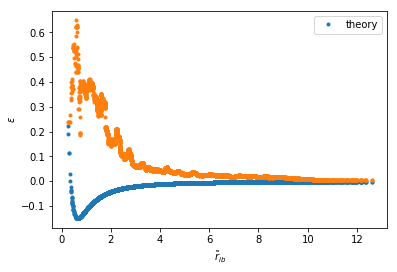

In [13]:
rt.r_ib_plot(p, r, 0.05)

Small $r_{jk}$ gives negative values at small $r_{ib}$, which in practice does not happen in the simulation.

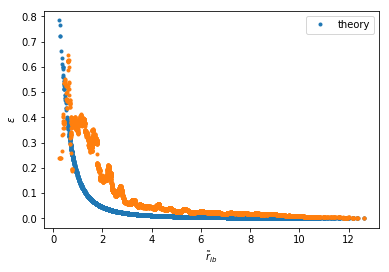

In [14]:
rt.r_ib_plot(p, r, 0.1)

For higher values of $r_{jk}$, the curves better agree, although the ratio always shows that at small $r_{ib}$ the agreement isn't 

In [ ]:
rt.r_jk_plot(p, r, 0.001)

### GRAVITY

In [17]:
alpha, beta = 1, 1
gamma = 0.2

#### Without data collapse

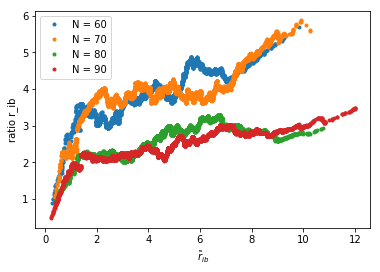

In [18]:
for N in [60, 70, 80, 90]:   
    p = pop_random(N)
    g = gravity(p, alpha, beta, gamma, exp=True)
    rt.plot_ratio(p, g, 0.03)
plt.show()

N.B. This plot was done with the previous moving average, so expected to be more wiggly.

I tried to reduce the window size at small $r_{ib}$ to prevent the ratio from going to 0, but it doesn't make much of a difference, except that it gets more wiggly and still tends to 0 (but goes down only to a positive value in the simulation):
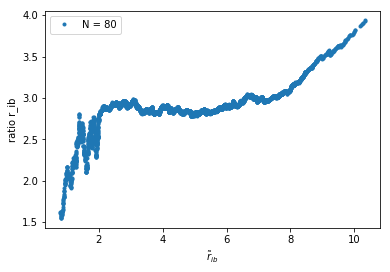
So I'll keep using the same window size throughout the whole range for practical reasons.

#### Data collapse

Instead of rescaling $r_{ib}$ by the typical scale, have just $r_{ib}$ on the x-axis to rescale

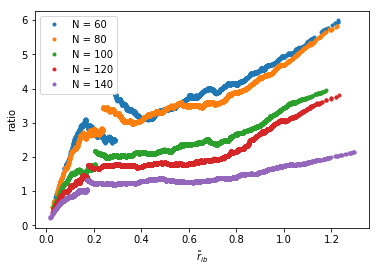

In [32]:
for N in [60, 80, 100, 120, 140]:   
    p = pop_random(N)
    g = gravity(p, alpha, beta, gamma, exp=True)
    rt.plot_ratio(p, g, 0.03, collapse = True)
plt.show()

(changed the movign average above).

We can clearly observe an onset at $r_{ib} \simeq ?$ below which the simulation gives highly noisy results - hence, when averaged to find the ratio, this is highly susceptible to the moving average window use. **No real conclusions can be made about the small $r_{ib}$ range** since here our analytical result (based on the assumption that $r_{ib}$ is big enough) does not hold.

In [33]:
N = 100
rt.plot_ratio_rjk(p, g, 0.1)

### Main conclusions/observations
* Not going to follow through with the **chi-square test** to find the renormalisation of the parameter $m_b$ in our scaling because plots of the simulation/analytical ratio show that this tends to 1 (because epsilon becomes bigger and bigger) as we go move both below and above $m_b = 2$ ---> cannot find anything meaningful in rescaling the parameter

* Perhaps could use other tests like the **Kolmogorov-Smirnov test** to check whether the model output and the simulation data are generated by an identical distribution or use the **Sørensen-Dice coefficient** to quantify the degree of similarity between the model predictions and the simulation observations
* 

## End of the Month Summary
1. Generally we find that the **gravity model** (in the exponential form) **gives a smaller** $\epsilon_g$ (<0.02%) **compared to the radiation model** ($\epsilon_r \simeq$ 10%). 
2. For the gravity model, the analytical error and the simulation show good agreement for a relatively high number of locations: Jim found that our approximation $k_{ij} \simeq k_{ib}$ holds for N > 50, in agreement with my data collapse, where below N = 60, the ratio $\frac{\epsilon_{sim}}{\epsilon_{anal}}$ significantly deviates from 1 at all scales
3. The above were observed for the exponential form of the gravity model with $\gamma = 0.2$. The same holds for higher $\gamma$, although higher deviations form the analytical result are observed (to confirm with Jim).
